### Introduction
In this project, I analyzed the Chick-fil-A Nutritional Facts and Allergens dataset to explore how nutritional contents are correlated with allergens. The dataset includes information on calories, fat, protein, and carbohydrates for various menu items, alongside allergen details such as Dairy, Egg, Soy, Wheat, Tree Nuts, and Fish.

Key Steps
1. Data Preparation: Cleaned and aggregated allergen data from multiple columns.
2. Exploratory Analysis: Performed initial analysis to understand the distribution of nutritional contents and allergens.
3. Correlation Analysis: Used statistical methods and visual tools to examine relationships between nutritional metrics and allergens.
4. Visualization: Created heatmaps, scatter plots, and bar charts to visualize correlations and trends.


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud

In [9]:
data = pd.read_csv('CFAfacts.csv')

In [10]:
data.head()

,Item,Serving size,Calories,Fat (G),Sat. Fat (G),Trans Fat (G),Cholesterol (MG),Sodium (MG),Carbohydrates (G),Fiber (G),Sugar (G),Protein (G),Dairy,Egg,Soy,Wheat,Tree Nuts,Fish
0,5 Ct Nuggets Kid's Meal,71g,160,7.0,1.5,0.0,50,760,7,0,1,17,1,1,0,1,0,0
1,2 Ct Chick-n-Strips® Kid's Meal,91g,200,9.0,2.0,0.0,50,580,11,0,1,19,1,1,0,1,0,0
2,5 Ct Grilled Nuggets Kid's Meal,59g,80,2.0,0.0,0.0,55,270,1,0,0,16,0,0,0,0,0,0
3,Barbeque Sauce,28g,45,0.0,0.0,0.0,0,200,11,0,9,0,0,0,0,0,0,0
4,Chick-fil-A® Sauce,28g,140,13.0,2.0,0.0,10,170,7,0,6,0,0,1,0,0,0,0


In [11]:
data.isna().sum()

Item                 0
Serving size         0
Calories             0
Fat (G)              0
Sat. Fat (G)         0
Trans Fat (G)        0
Cholesterol (MG)     0
Sodium (MG)          0
Carbohydrates (G)    0
Fiber (G)            0
Sugar (G)            0
Protein (G)          0
Dairy                0
Egg                  0
Soy                  0
Wheat                0
Tree Nuts            0
Fish                 0
dtype: int64

In [12]:
data.describe()

,Calories,Fat (G),Sat. Fat (G),Trans Fat (G),Cholesterol (MG),Sodium (MG),Carbohydrates (G),Fiber (G),Sugar (G),Protein (G),Dairy,Egg,Soy,Wheat,Tree Nuts,Fish
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,436.639004,21.180498,6.885892,0.109959,86.701245,903.838174,45.556017,2.734440,26.547718,17.601660,0.576763,0.431535,0.331950,0.448133,0.058091,0.0
std,755.559471,47.719226,25.628647,0.556537,152.969938,1995.731408,80.463022,6.702924,65.688714,34.357178,0.495100,0.496321,0.471893,0.498337,0.234403,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,110.000000,0.000000,0.000000,0.000000,0.000000,75.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,310.000000,12.000000,3.500000,0.000000,35.000000,440.000000,29.000000,1.000000,7.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,560.000000,29.000000,8.000000,0.000000,90.000000,1340.000000,45.000000,3.000000,26.000000,29.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
max,9850.000000,624.000000,355.000000,7.000000,1500.000000,26050.000000,616.000000,63.000000,517.000000,442.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               241 non-null    object 
 1   Serving size       241 non-null    object 
 2   Calories           241 non-null    int64  
 3   Fat (G)            241 non-null    float64
 4   Sat. Fat (G)       241 non-null    float64
 5   Trans Fat (G)      241 non-null    float64
 6   Cholesterol (MG)   241 non-null    int64  
 7   Sodium (MG)        241 non-null    int64  
 8   Carbohydrates (G)  241 non-null    int64  
 9   Fiber (G)          241 non-null    int64  
 10  Sugar (G)          241 non-null    int64  
 11  Protein (G)        241 non-null    int64  
 12  Dairy              241 non-null    int64  
 13  Egg                241 non-null    int64  
 14  Soy                241 non-null    int64  
 15  Wheat              241 non-null    int64  
 16  Tree Nuts          241 non

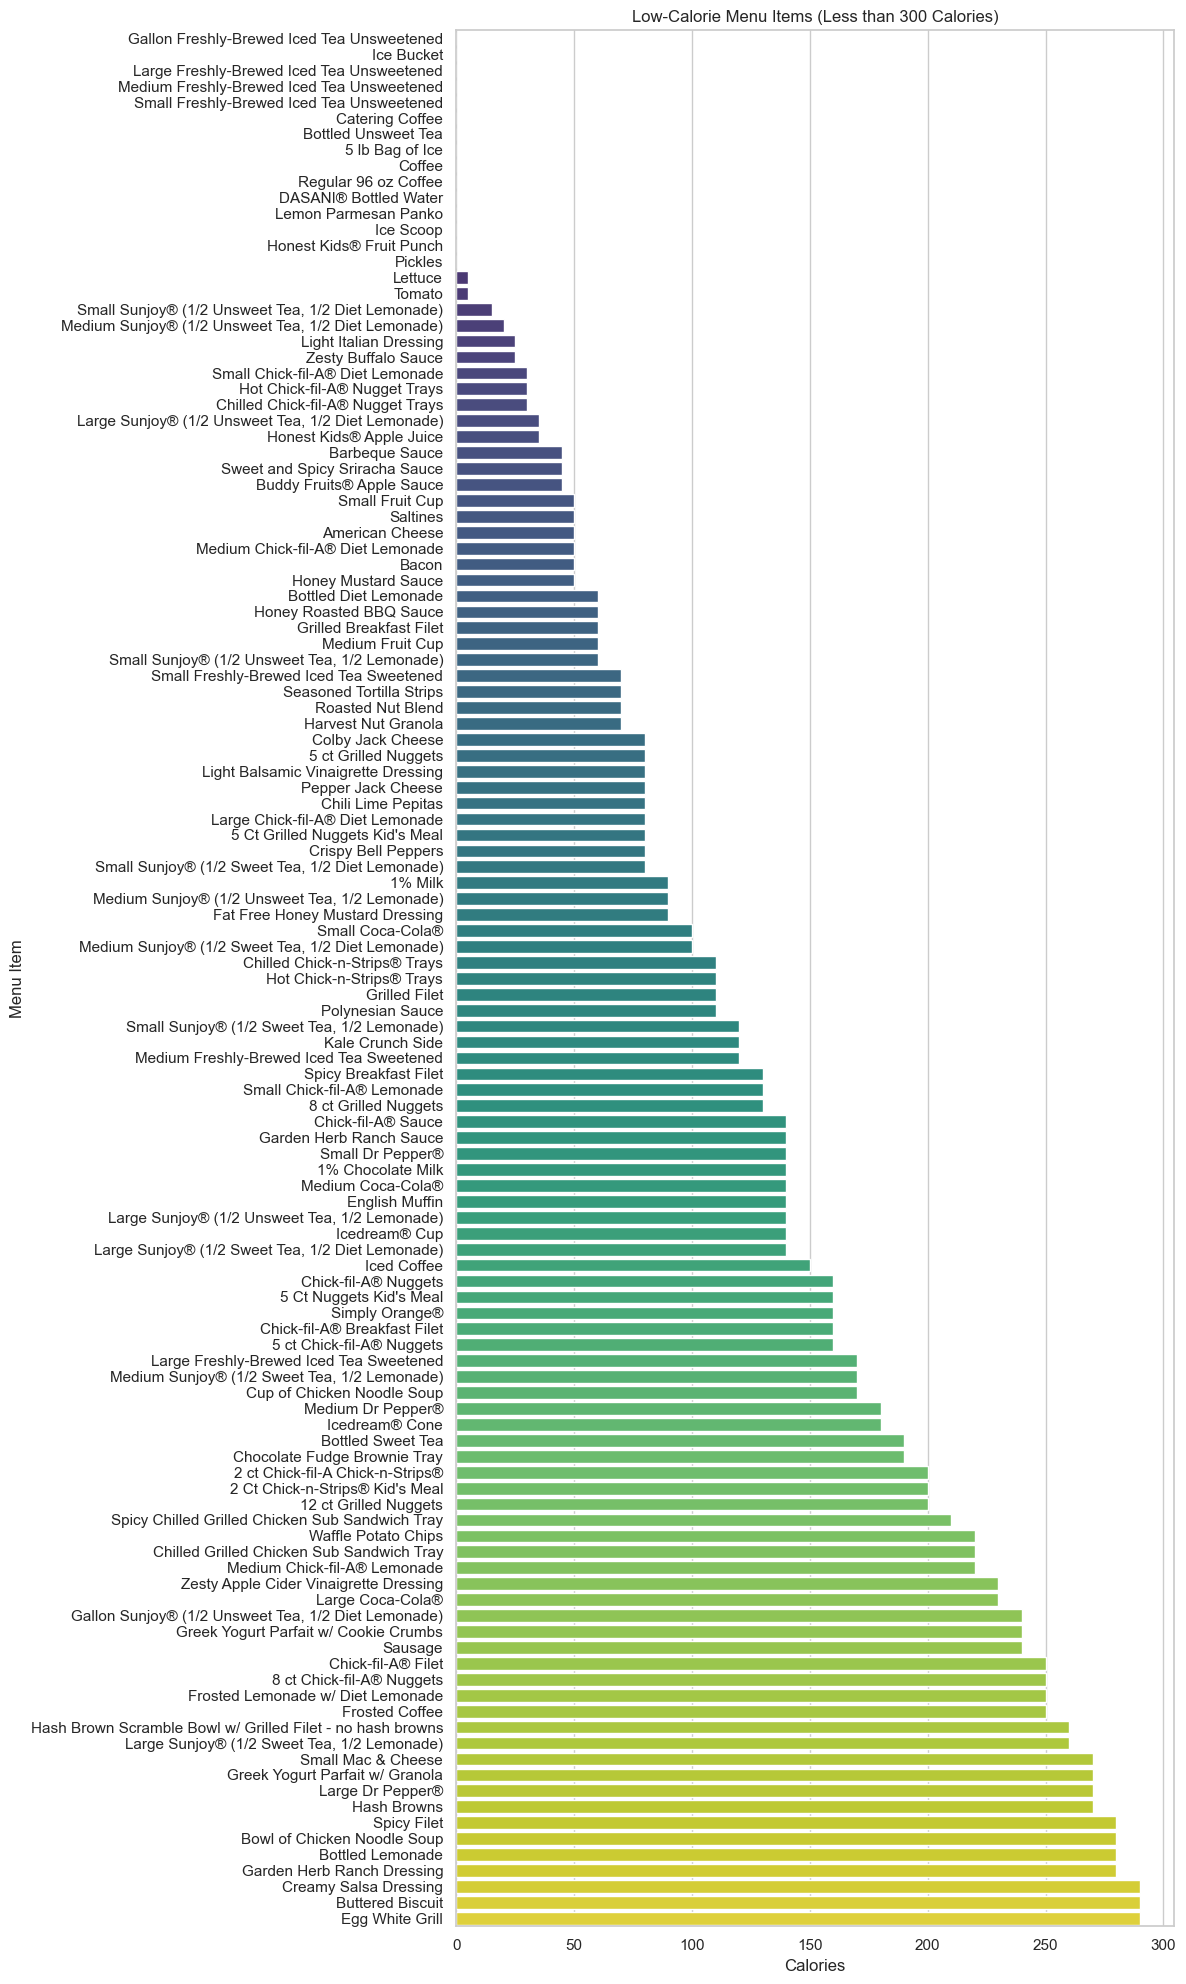

In [16]:

sns.set(style="whitegrid")

# Filter items with less than 300 calories
low_calorie_items = data[data['Calories'] < 300]

# Plotting the distribution of calorie counts
plt.figure(figsize=(12, 20))
sns.barplot(x='Calories', y='Item', data=low_calorie_items.sort_values('Calories'), palette='viridis')
plt.title('Low-Calorie Menu Items (Less than 300 Calories)')
plt.xlabel('Calories')
plt.ylabel('Menu Item')
plt.tight_layout()
plt.show()


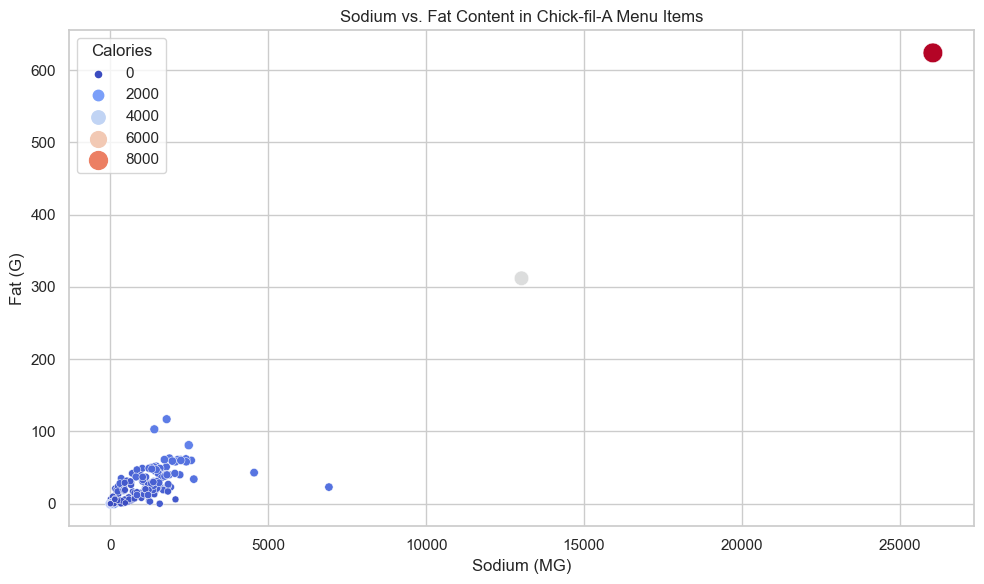

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sodium (MG)', y='Fat (G)', hue='Calories', size='Calories', data=data, palette='coolwarm', sizes=(20, 200))
plt.title('Sodium vs. Fat Content in Chick-fil-A Menu Items')
plt.xlabel('Sodium (MG)')
plt.ylabel('Fat (G)')
plt.legend(title='Calories')
plt.tight_layout()
plt.show()


/var/folders/08/bklv4sgx7wnfq2sn9wk1r9sw0000gn/T/ipykernel_61057/361329202.py:9: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


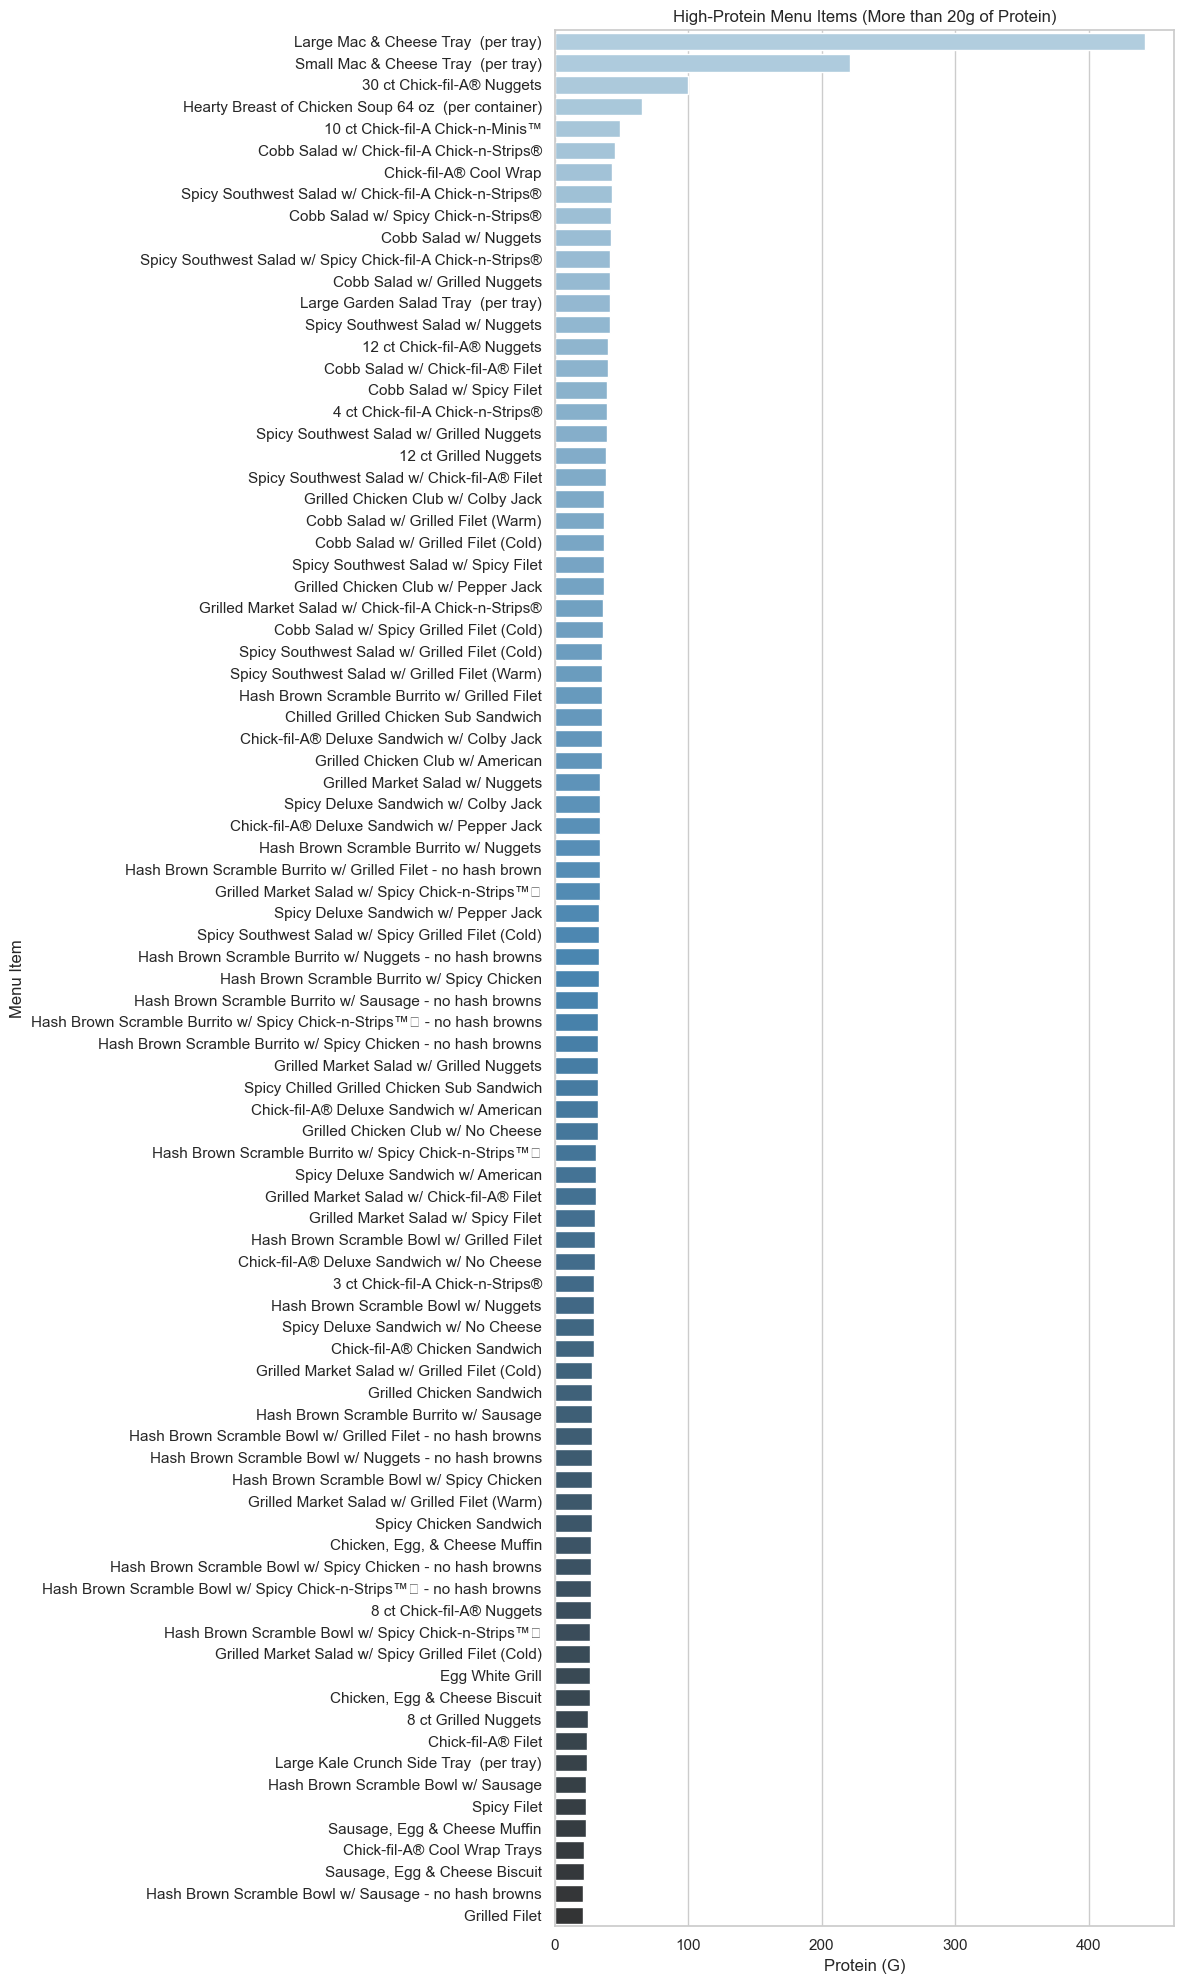

In [19]:
high_protein_items = data[data['Protein (G)'] > 20]

# Bar chart for protein content
plt.figure(figsize=(12, 20))
sns.barplot(x='Protein (G)', y='Item', data=high_protein_items.sort_values('Protein (G)', ascending=False), palette='Blues_d')
plt.title('High-Protein Menu Items (More than 20g of Protein)')
plt.xlabel('Protein (G)')
plt.ylabel('Menu Item')
plt.tight_layout()
plt.show()


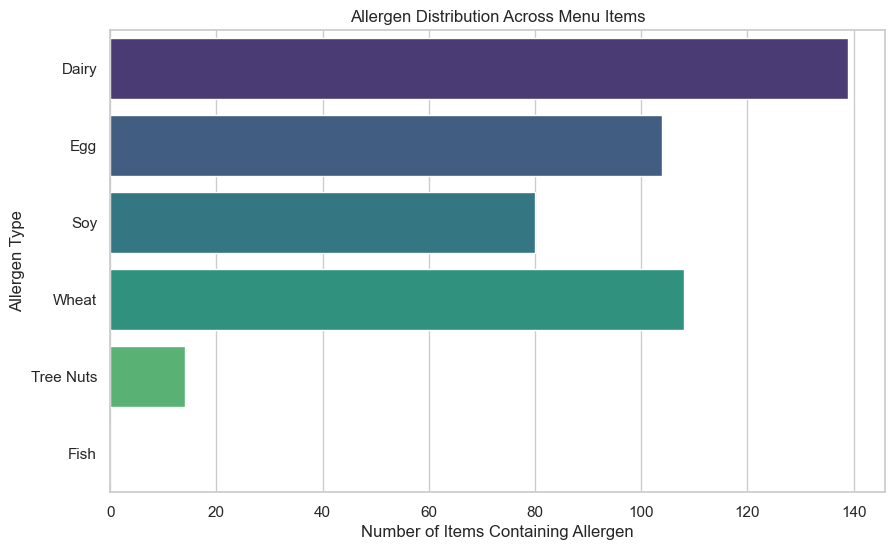

In [27]:
allergen_columns = ['Dairy', 'Egg', 'Soy', 'Wheat', 'Tree Nuts', 'Fish']
allergen_counts = data[allergen_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=allergen_counts.values, y=allergen_counts.index, palette="viridis")
plt.title('Allergen Distribution Across Menu Items')
plt.xlabel('Number of Items Containing Allergen')
plt.ylabel('Allergen Type')
plt.show()

In [23]:
# Fill missing values with 0 if the dataset assumes binary allergen presence
data[allergen_columns] = data[allergen_columns].fillna(0)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


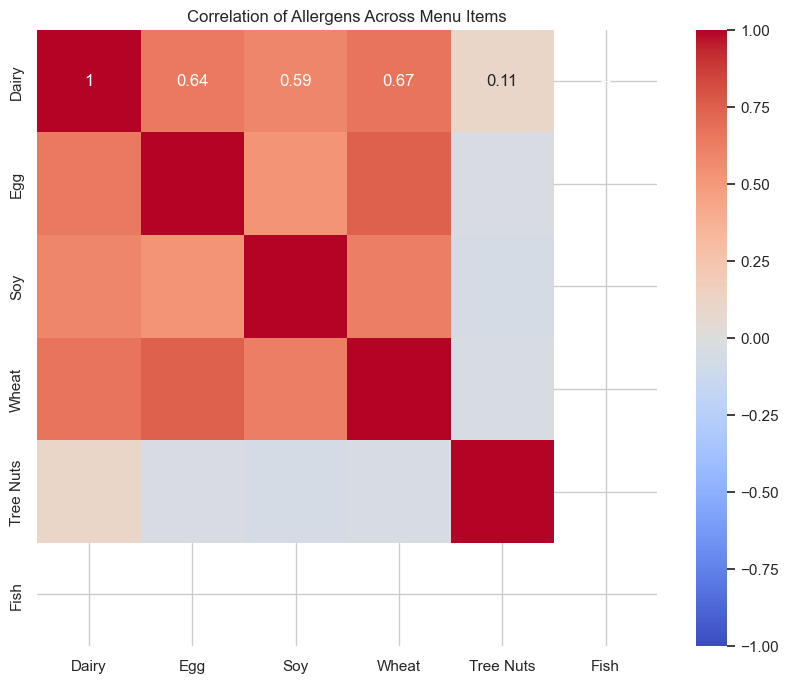

In [28]:
allergen_corr = data[allergen_columns].corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(allergen_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Allergens Across Menu Items')
plt.show()

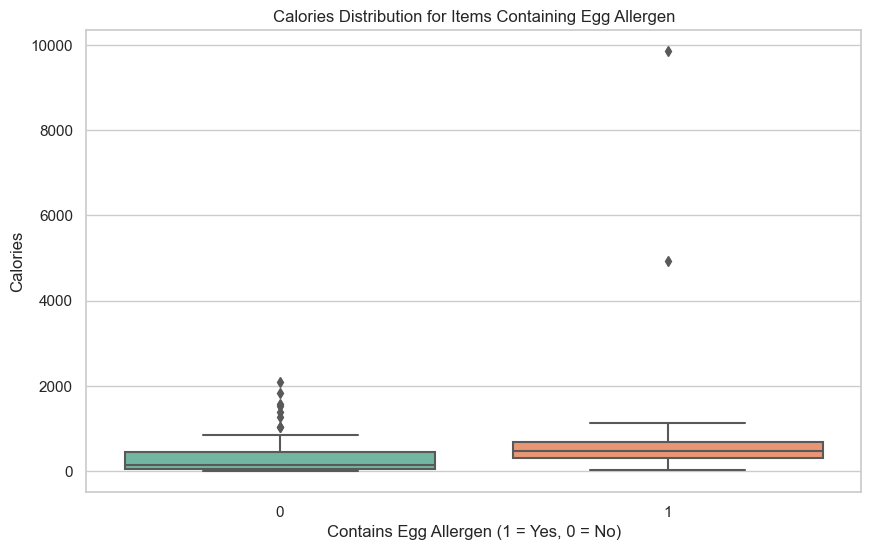

In [30]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Egg'], y=data['Calories'], palette="Set2")
plt.title('Calories Distribution for Items Containing Egg Allergen')
plt.xlabel('Contains Egg Allergen (1 = Yes, 0 = No)')
plt.ylabel('Calories')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


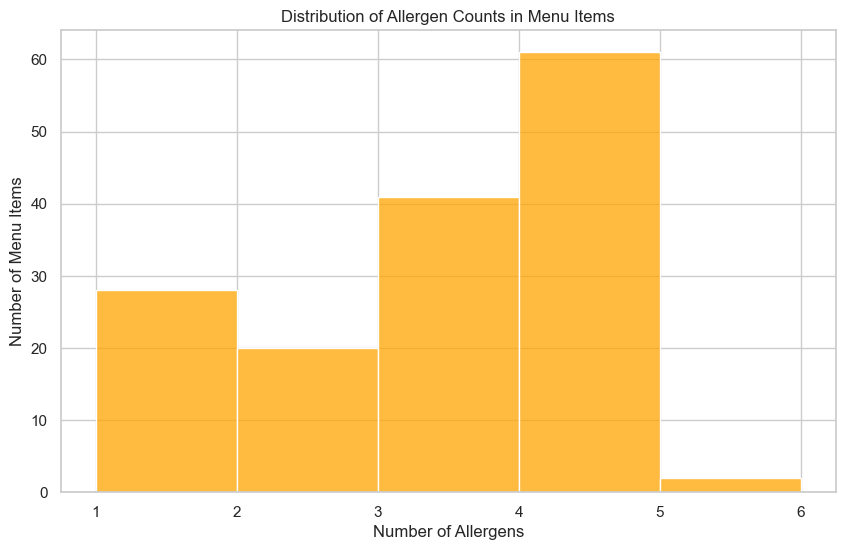

In [31]:
# Count the number of allergens in each menu item
data['Allergen Count'] = data[allergen_columns].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data['Allergen Count'], bins=range(1, data['Allergen Count'].max() + 2), kde=False, color='orange')
plt.title('Distribution of Allergen Counts in Menu Items')
plt.xlabel('Number of Allergens')
plt.ylabel('Number of Menu Items')
plt.show()


### Findings

Through the analysis, several key insights emerged regarding the relationship between nutritional contents and allergens:

1. Nutritional Patterns in Allergen-Containing Items: The data revealed specific patterns in menu items containing allergens. For example, items with Dairy and Tree Nuts often had higher fat and calorie content compared to those without these allergens. This suggests that allergen-rich items may contribute more significantly to overall caloric and fat intake.

2. Correlation Trends: The correlation analysis highlighted significant relationships between certain allergens and nutritional metrics. For instance:

 High Caloric Content: Menu items with Dairy and Egg allergens generally had higher caloric values. This could indicate that these allergens are more prevalent in richer, more calorie-dense foods.
Increased Fat Content: Items containing Tree Nuts and Fish were often associated with higher fat levels, reflecting the fat content typical of these ingredients.

Visualization Insights:

3. Heatmaps showed distinct patterns where certain allergens consistently aligned with higher nutritional values, such as calories and fat.
Scatter Plots demonstrated strong correlations between specific allergens and nutritional metrics, such as the relationship between Soy and protein content.
Bar and Pie Charts illustrated the frequency of allergens across various nutritional categories, revealing that some allergens are more common in higher-calorie and higher-fat items.

4. Potential Areas for Improvement: The findings suggest opportunities for Chick-fil-A to potentially reformulate certain products to balance nutritional content while managing allergen presence. This could involve reducing fat or calorie content in allergen-rich items or offering alternatives with better nutritional profiles.

Overall, the analysis provided a clearer understanding of how allergens influence nutritional values, which can inform both dietary choices for consumers and product development strategies for Chick-fil-A.